In [ ]:
## VERSION 1 : dictionaries ---> size: 36968 | 1050/1050CPU times: user 47.1 s, sys: 1.69 s, total: 48.8 s Wall time: 50.1 s
dict_images = {}
# loop on the pictures in the file
for i, ind in enumerate(li_files,1):
    print('\r', f"{i}/{len(list(li_files))}", end="")
    # cast each image to a np.array
    img = np.array(Image.open(file_path+ind))
    # apply a preprocessing
    new_img = preproc_func(img, **preproc_params)
    # put in the dictionnary
    dict_images[ind] = new_img


In [ ]:
''' Takes an image, resizes the image and fills the non existing space
with custom color 
'''

import cv2
import numpy as np
from PIL import Image, ImageOps
from PIL.ImageFilter import GaussianBlur

### A MODIFIER POUR DEVENIR UN PIPELINE POUVANT PRENDRE UNE LISTE DE
# TRANSFORMATIONS A APPLIQUER DANS L'ORDRE [('resize', 'gauss_blur', 'auto_contrast')]

def preproc_image(img, resize_first=False,
                  sq_size=224, fill_col=(255,255,255), interpolation=cv2.INTER_AREA,
                  grey=False, autocontrast = False, equalize=False, gauss_blur = None,
                  median_blur=None, non_loc_denois=False):

    # resize first
    if resize_first:
        img = np.array(resize_image(img, sq_size, fill_col, interpolation))

    # # checking image format
    # if type(img) == np.ndarray:
    #     img = Image.fromarray(img)
    # elif type(img) == PIL.Image.Image:
    #     pass
    # else:
    #     print("ERROR: image format unknown, please give np.array or PIL.Image.Image")

    # other preprocessings
    if grey:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if autocontrast:
        img = np.array(ImageOps.autocontrast(Image.fromarray(img)))
    if equalize:
        img = np.array(ImageOps.equalize(Image.fromarray(img)))
    if gauss_blur is not None:
        # img = img.filter(GaussianBlur(radius=gauss_blur))
        img = cv2.GaussianBlur(img, (gauss_blur, gauss_blur),0)
    if median_blur is not None:
        img = cv2.medianBlur(img, median_blur)
    if non_loc_denois:
        img = cv2.fastNlMeansDenoising(img)

    # resize at the end
    if not resize_first:
        img = np.array(resize_image(img, sq_size, fill_col, interpolation))

    return np.array(img)

Visualisation séparée des trois canaux (Hue, Saturation, Value)

In [ ]:
# fig = plt.figure(figsize=(10,4))
# li_n = []
# for im, color, title, i in zip([img_h, img_s, img_v],
#                                 ['red', 'blue', 'black'],
#                                 ['Hue', 'Saturation', 'Value'],
#                                 range(1,4)):
#     ax1 = fig.add_subplot(2,3,i)
#     ax1.imshow(im, cmap='Greys')
#     ax1.set(xlim=(0,255))
#     ax1.set_title(title, fontweight='bold')
#     ax2 = fig.add_subplot(2,3,i+3)
#     n, bins, patches = ax2.hist(im.flatten(), color=color, bins=range(256))
#     li_n.append(n)
# plt.tight_layout(rect=[0,0,1,0.92])
# plt.show()

In [ ]:
def print_thumbnails_from_file(file_path, li_files, sq_size=224, n_rows=1,
                     figsize=(15,2), fig=None):

    n_tot = len(li_files)
    n_cols = (n_tot//n_rows)+((n_tot%n_rows)>0)*1
    fig = plt.figure(figsize=figsize) if fig is None else fig
    for i, ind in enumerate(li_files,1):

        img = np.array(Image.open(file_path+ind))
        img = preproc_image(img, size=sq_size, fill_col=(255,255,255),
                        interpolation=Image.ANTIALIAS)
        ax = fig.add_subplot(n_rows,n_cols,i)
        # ax = fig.add_subplot(1,(len(li_files)),i)
        ax.imshow(img)
        ax.set_axis_off()

In [ ]:
def print_sample_by_from_file(file_path, sercat, n_img=10, **preproc_params): # sq_size=100, figsize=(20,2), 
    gb = df_pict.groupby(sercat)
    for name, sub_df in gb:
        li_files = sub_df.sample(n_img).index
        print(name)
        print_thumbnails_from_file(file_path, li_files,
                         figsize = figsize,
                         sq_size=sq_size, n_rows=2)
        plt.show()

Baby


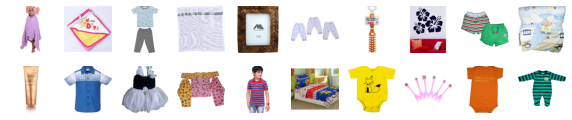

Beauty


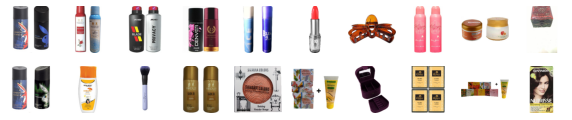

Computers


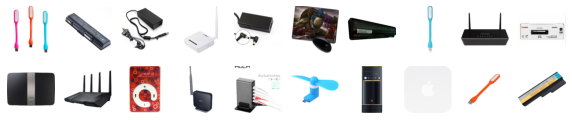

Decor


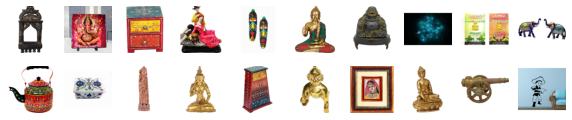

Furnishing


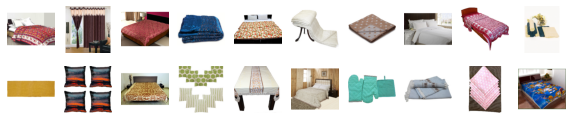

Kitchen


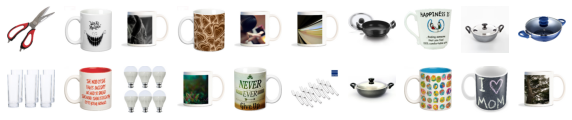

Watches


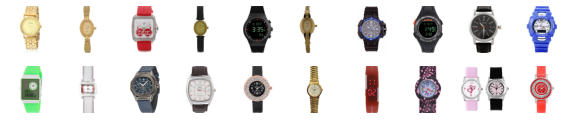

In [ ]:
# rgb_to_hsv = np.vectorize(colorsys.rgb_to_hsv)
file_path = "../DATA/Images/"
preproc_params={'sq_size': 80}
sq_size = 224
figsize = (10,2)
n_img = 20
sercat = df_pict['category']

print_sample_by_from_file(file_path, sercat, n_img, **preproc_params)

# IDEES A IMPLEMENTER

#### overview des mots de l'ensemble du corpus

In [ ]:
# Graph top tags

# inputs
top_n = 50   # number of tag to display
df_1 = pd.DataFrame(all_tags.most_common(), columns=["tags","freq_all"])

#plot
fig = plt.figure(figsize=(15,10))

# hist
plt.subplot(1,2,1)
plt.title("Top tags by frequency", fontweight="bold", size=20)
sns.barplot(x= "freq_all", y= "tags", data= df_1.loc[0:top_n, :], label="Total")
plt.yticks(rotation=0, size=13)
plt.ylabel("Tags", size=16)
plt.xlabel("Tags frequency [number of occurences]", size=16)

# word cloud Graph
plt.subplot(1,2,2)
wordcloud = WordCloud(width=375,
                      height=600,
                      max_words=1628,
                      relative_scaling=1,
                      normalize_plurals=False,
                      background_color="white").generate_from_frequencies(dict(all_tags.most_common(400)))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

#### Graphe des occurences des mots du titre en fonction de ceux des mots de la description

In [ ]:
# Relation in-between frequency for top tags versus primary tags 

#inputs
df_2 = pd.DataFrame(primary_tags.most_common(), columns=["tags","freq_primary"])  
df = pd.merge(df_1, df_2, how="left" )

# plot
plt.figure(figsize=(10, 10))
plt.title("Frequency: Top tags versus Primary tags", fontweight="bold", size = 20)
sns.plt.scatter(x="freq_all", y="freq_primary", data=df, alpha=0.5)

# text annotations
for i in range(0,18):
    plt.annotate(df.loc[i,"tags"],
                 (df.loc[i,"freq_all"]+200, df.loc[i,"freq_primary"]+50),
                 size=15)

# unity line
u = np.linspace(0,17500,10)
plt.plot(u,u, c="red")
plt.plot(u,u*0, c="blue")
    
plt.xlabel("Top tags frequency [number of occurences]", size=16)
plt.ylabel("Primary tags frequency [number of occurences]", size=16)
plt.show() 

#### Somme cumulée des fréquences des mots les plus utilisés (à faire avec le product_name et avec les descriptions pour avoir une intuition du nb de mots à conserver....

In [ ]:
# Input
cumsum = 100*df.loc[:, "freq_all"].cumsum()/df["freq_all"].sum()
mask = cumsum > 50          # we want at least 50% of the occurence
n_tag = cumsum.loc[mask].argmin()
x = np.linspace(0, 500, 10)

# plot
plt.figure(figsize=(10,7))
plt.plot(cumsum)
plt.axhline(y=50, xmax=n_tag/500, color='r', linestyle=':')
plt.axvline(x=n_tag, ymax=50/80, color='r', linestyle=':')
plt.xlim(-3,500)
plt.ylim(0,80)
plt.title("Normalised cumulative sum of top tags occurence", fontweight="bold", size=20)
plt.xlabel("Number of top tags", size=16)
plt.ylabel("Normalised occurence cumulative sum [%]", size=16)
plt.show()

#### Affichage avec PyLDAvis

In [ ]:
# plot with PyLDAvis library
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_tfidf_uns, tfidf, tfidf_vectorizer, mds='tsne')
panel

In [ ]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

### Voir davidjulienmillet pour l'affichage des descripteurs SIFT !!!

In [ ]:
# Version qui marche mais la sortie de .cv_results_ n'a pas le même format qu'un
# gridsearch standard

'''
Class to optimize clustering score.
Instantiate with a clusterer (estimator), a grid parameter (param_grid)
and a scoring function or a dictionary of functions (scoring)
'''

import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import ParameterGrid

class GridSearchClust(BaseEstimator, TransformerMixin):

    def __init__(self, estimator, param_grid_estim, param_grid_preproc=None,
                 scoring=None, refit=silhouette_score, greater_is_better=True):

        # Getting parameters
        self.estimator = estimator
        self.param_grid_estim = param_grid_estim
        self.param_grid_preproc = param_grid_preproc
        self.scoring = scoring
        self.refit = refit
        self.greater_is_better = greater_is_better

    def fit(self, X, verbose=False):

        # Initialization of the dict of results
        self.results_ = {"scores": [],
                         "params": [],
                         "models": [],
                        #  "fit_times": [],
                         "nb_clusters": [],
                         "refit_score": []}

        # iterating upon all combinations of parameters
        for param in ParameterGrid(self.param_grid_estim):

            # instanciation of the model with selected parameters
            model = self.estimator.set_params(**param)

            # fitting the model
            model.fit(X)

            # computing labels
            labels = model.labels_

            # # Measuring training time while fitting the model on the data
            # time_train = %timeit -n1 -r1 -o -q model.fit(X)
            # time_train = time_train.average

            # Refit score
            try:
                refit_score = self.refit(X, labels) # self.scoring['silh'](X, labels)
            except:
                refit_score = np.nan
            
            # Other scores (scoring)
            model_score = {}
            if not self.scoring:  # if scoring parameter not defined
                model_score['score'] = model.score(X) # default score
            else:  # if scoring parameter is defined
                if type(self.scoring) != dict:
                    self.scoring = {'score': self.scoring}
                else:
                    for n_sco, sco in self.scoring.items():
                        try:
                            model_score[n_sco] = sco(X, labels)
                        except:
                            model_score[n_sco] = np.nan
            if verbose: print(model_score)
            
            # Computing number of clusters, excluding noise (#-1)
            nb_clusters = \
                len(set(model.labels_)) - (1 if -1 in set(model.labels_) else 0)
            nb_clusters = int(nb_clusters)
            if verbose: print(nb_clusters)

            # saving results, parameters and models in a dict
            self.results_["refit_score"].append(refit_score)  # refit score
            self.results_["scores"].append(model_score)  # dict of scores
            self.results_["params"].append(param)  # parameters
            self.results_["models"].append(model)  # trained models
            # self.results_["fit_times"].append(time_train)  # training time
            self.results_["nb_clusters"].append(nb_clusters)  # nb of clusters
        
        # Selecting best model based on the refit_score
        # -----------------------------------
        # initialisation
        best_model_index, best_score = None, None  
        # iterating over scores
        for index, score in enumerate(self.results_["refit_score"]):

            # initialisation
            if not best_score:
                best_score = score
                best_model_index = index

            # if score is better than current best_score
            cond = score > best_score if self.greater_is_better\
                                                 else score < best_score
            if cond:
                    # update the current best_score and current best_model_index
                    best_score = score
                    best_model_index = index
        
        # Update attributes of the instance
        self.best_refit_score_ = self.results_["refit_score"][best_model_index]
        self.best_score_ = self.results_["scores"][best_model_index]
        self.best_params_ = self.results_["params"][best_model_index]
        self.best_estimator_ = self.results_["models"][best_model_index]
        self.best_index_ = best_model_index
        # self.refit_time_ = self.results_["fit_times"][best_model_index]

        # refit the best model
        self.best_estimator_.fit(X)
        
        return self

    def predict(self, X_test):

        # use the .predict method of the estimator on the best model
        return self.best_model.predict(X_test)

In [ ]:
#### REGRESSEUR AVEC GRIDSEARCH POUR MEMOIRE

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from random import randint
from sklearn import metrics

df_X = pd.DataFrame({'a': np.arange(1000)+randint(0,1000)/100,
                    'b': np.arange(1000,2000)+randint(0,1000)/100})
df_y = pd.Series(np.arange(50,1050)+randint(0,1000)/100)
ss = StandardScaler()
lreg = LinearRegression()

pipe_reg = Pipeline([('preproc', ss),
                     ('reg', lreg)])

params = {'reg__fit_intercept': [True, False],
          'reg__normalize': [True, False]}

# Mean Absolute Error
def calc_mae(y, ypr):
    return metrics.mean_absolute_error(y, ypr)
def calc_mae_log(y_log, y_log_pr):
    y = np.exp(y_log)-1
    ypr = np.exp(y_log_pr)-1
    return metrics.mean_absolute_error(y, ypr)
# Root Mean Squared Error
def calc_rmse(y, ypr):
    return np.sqrt(metrics.mean_squared_error(y, ypr))
def calc_rmse_log(y_log, y_log_pr):
    y = np.exp(y_log)-1
    ypr = np.exp(y_log_pr)-1
    return np.sqrt(metrics.mean_squared_error(y, ypr))
mae = metrics.make_scorer(calc_mae, greater_is_better=False)
rmse = metrics.make_scorer(calc_rmse, greater_is_better=False) 

gscv = GridSearchCV(pipe_reg,
                    param_grid=params,
                    scoring={'mae': mae,
                             'mse': rmse},
                    refit='mse'
                    )
gscv.fit(df_X.values, df_y.values)